# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [1]:
### YOUR CODE HERE ###

# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Visualization package imports
import seaborn as sns
import matplotlib.pyplot as plt



### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [3]:
### YOUR CODE HERE ###
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [4]:
### YOUR CODE HERE ###
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [11]:
### YOUR CODE HERE ###
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [12]:
df_original['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [14]:
df_original['Class'].value_counts(normalize=True)

Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [16]:
### YOUR CODE HERE ###
df_original['satisfaction'].value_counts(),df_original['satisfaction'].value_counts(normalize=True)

(satisfied       71087
 dissatisfied    58793
 Name: satisfaction, dtype: int64,
 satisfied       0.547328
 dissatisfied    0.452672
 Name: satisfaction, dtype: float64)

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

There are **71087 satisfied** customers and **58793 dissatisfied** customers.

**Question:** What percentage of customers were satisfied? 

- **54.7 percent** of customers were **satisfied**
- **45.3 percent** of customers were **dissatisfied**
- This value can be compared to a decision tree's model accuracy.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [17]:
### YOUR CODE HERE ###
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

This is important to check because if there are only a small number of missing values in the dataset, they can more safely be removed.

### Check the number of rows and columns in the dataset

In [18]:
### YOUR CODE HERE ###
df_original.shape

(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [24]:
### YOUR CODE HERE ###
df_subset=df_original.dropna(axis=0).reset_index(drop = True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [25]:
### YOUR CODE HERE ###
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [26]:
df_subset.shape

(129487, 22)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [27]:
### YOUR CODE HERE ###
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [28]:
### YOUR CODE HERE ###
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [29]:
### YOUR CODE HERE ###
df_subset['satisfaction'] = df_subset['satisfaction'].replace({"satisfied": 1, "dissatisfied": 0})
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [30]:
### YOUR CODE HERE ###
df_subset=pd.get_dummies(df_subset, drop_first = True)


In [31]:
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0.0,0,1


In [33]:
df_subset.columns.tolist()

['satisfaction',
 'Age',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel']

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [35]:
### YOUR CODE HERE ###
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [36]:
### YOUR CODE HERE ###
y = df_subset["satisfaction"]

X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [38]:
### YOUR CODE HERE ###
decision_tree=DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

- Decision trees **require no assumptions** regarding the distribution of underlying data 
- **Don't require scaling of features**. 
- This lab uses decision trees because there is **no need for additional data processing**, unlike some other models.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [39]:
### YOUR CODE HERE ###
print("Decision Tree")
print("Accuracy:", "%.6f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % f1_score(y_test,dt_pred))

Decision Tree
Accuracy: 0.935438
Precision: 0.942859
Recall: 0.939030
F1 Score: 0.940940


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Decision trees can be particularly **susceptible to overfitting**. 
- Combining **hyperparameter tuning** and **grid search** can help ensure this doesn't happen. For instance, setting an appropriate **value for max depth** could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

In [40]:
decision_tree.classes_

array([0, 1])

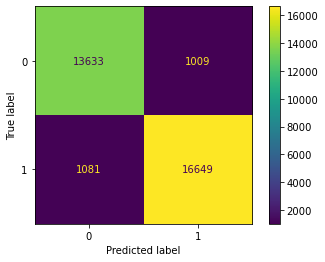

In [42]:
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot(values_format='')

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

In the confusion matrix, there are a **high proportion of true positives and true negatives** (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively).

The matrix also had a relatively **low number of false positives and false negatives** (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.)

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

In [43]:
X.columns

Index(['Age', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')

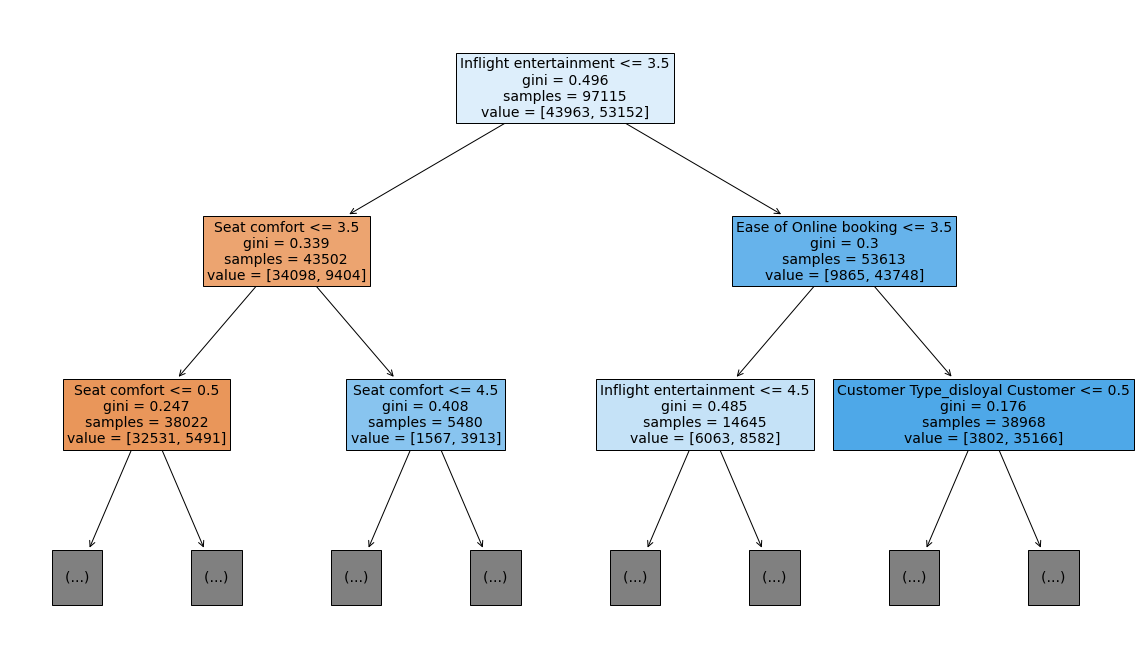

In [46]:
### YOUR CODE HERE ###
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, filled=True) 
plt.show()

In [48]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
forest_importances

Inflight entertainment               0.391089
Seat comfort                         0.175545
Ease of Online booking               0.066687
Customer Type_disloyal Customer      0.043974
Flight Distance                      0.031842
Gate location                        0.031235
Age                                  0.027206
Type of Travel_Personal Travel       0.024644
Departure/Arrival time convenient    0.023795
Class                                0.023103
Checkin service                      0.019927
Online support                       0.019807
Leg room service                     0.019785
Cleanliness                          0.019426
Food and drink                       0.015244
Baggage handling                     0.014267
Arrival Delay in Minutes             0.013111
Online boarding                      0.011299
On-board service                     0.011044
Departure Delay in Minutes           0.010903
Inflight wifi service                0.006067
dtype: float64

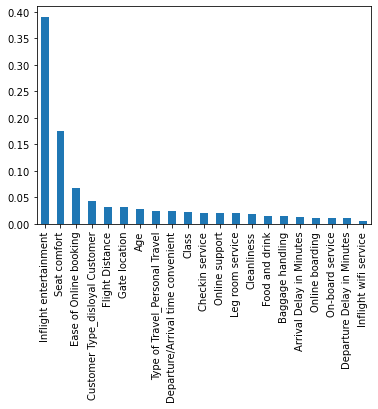

In [49]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [47]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [50]:
### YOUR CODE HERE ###
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

Use the **best estimator tool** to help uncover the best pair combination.

### Compute the best combination of values for the hyperparameters

In [51]:
### YOUR CODE HERE ###
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

After running the DecisionTreeClassifier, the **maximum depth is 18** and the **minimum number of samples is 2**, meaning this is the **best combination** of values.

<strong> Question: What was the best average validation score? </strong>

In [52]:
### YOUR CODE HERE ###
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9454


The **best validation score is 0.9454**.

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [53]:
clf.cv_results_

{'mean_fit_time': array([0.05002503, 0.04928079, 0.04947314, 0.05065331, 0.05082207,
        0.04969621, 0.05086188, 0.05385065, 0.05021749, 0.05006909,
        0.04917102, 0.04957862, 0.08525753, 0.08709126, 0.08439374,
        0.0846427 , 0.09047923, 0.08453441, 0.08788905, 0.08727012,
        0.08606272, 0.08455086, 0.08732915, 0.08339152, 0.12012987,
        0.12068291, 0.12027941, 0.12119341, 0.11999269, 0.1207953 ,
        0.11983705, 0.12010064, 0.11981859, 0.11922164, 0.1203434 ,
        0.11783638, 0.15899186, 0.15504551, 0.16095099, 0.15575123,
        0.15694203, 0.15750442, 0.15422592, 0.15264478, 0.15631022,
        0.15546808, 0.15495582, 0.15870523, 0.18860884, 0.19423943,
        0.19158983, 0.19247317, 0.19257679, 0.19405246, 0.1937799 ,
        0.19742293, 0.19639764, 0.1948606 , 0.19289684, 0.18943915,
        0.23105731, 0.22245922, 0.22752838, 0.23099246, 0.24044023,
        0.24361925, 0.22705564, 0.23938622, 0.22816143, 0.22125401,
        0.22610679, 0.22796378,

In [55]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_precision,split1_test_precision,split2_test_precision,...,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.050025,0.001566,0.024075,0.000281,1,2,"{'max_depth': 1, 'min_samples_leaf': 2}",0.818029,0.814560,0.816307,...,0.001047,265,0.822876,0.823065,0.823142,0.820414,0.825870,0.823073,0.001728,265
1,0.049281,0.000561,0.023993,0.000140,1,3,"{'max_depth': 1, 'min_samples_leaf': 3}",0.818029,0.814560,0.816307,...,0.001047,265,0.822876,0.823065,0.823142,0.820414,0.825870,0.823073,0.001728,265
2,0.049473,0.001097,0.024316,0.000493,1,4,"{'max_depth': 1, 'min_samples_leaf': 4}",0.818029,0.814560,0.816307,...,0.001047,265,0.822876,0.823065,0.823142,0.820414,0.825870,0.823073,0.001728,265
3,0.050653,0.000817,0.024773,0.001095,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.818029,0.814560,0.816307,...,0.001047,265,0.822876,0.823065,0.823142,0.820414,0.825870,0.823073,0.001728,265
4,0.050822,0.002612,0.024022,0.000294,1,6,"{'max_depth': 1, 'min_samples_leaf': 6}",0.818029,0.814560,0.816307,...,0.001047,265,0.822876,0.823065,0.823142,0.820414,0.825870,0.823073,0.001728,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.443701,0.007416,0.025536,0.000258,50,9,"{'max_depth': 50, 'min_samples_leaf': 9}",0.946648,0.945470,0.947943,...,0.001289,97,0.936318,0.939422,0.938758,0.935183,0.935372,0.937011,0.001754,21
272,0.454062,0.016869,0.026384,0.001350,50,10,"{'max_depth': 50, 'min_samples_leaf': 10}",0.948730,0.949544,0.948684,...,0.002256,83,0.934719,0.939987,0.939135,0.935560,0.933302,0.936540,0.002584,29
273,0.440880,0.008123,0.025486,0.000108,50,15,"{'max_depth': 50, 'min_samples_leaf': 15}",0.946662,0.952404,0.945382,...,0.002207,87,0.934907,0.939234,0.937912,0.932738,0.936500,0.936258,0.002275,40
274,0.430323,0.008846,0.025372,0.000141,50,20,"{'max_depth': 50, 'min_samples_leaf': 20}",0.945470,0.948742,0.949131,...,0.002158,115,0.934531,0.940175,0.930292,0.930480,0.932832,0.933662,0.003615,93


In [56]:
cv_results['mean_test_f1'].idxmax()

204

In [58]:
best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
best_estimator_results 

mean_fit_time                                             0.459164
std_fit_time                                              0.005202
mean_score_time                                           0.025906
std_score_time                                            0.000446
param_max_depth                                                 18
param_min_samples_leaf                                           2
params                    {'max_depth': 18, 'min_samples_leaf': 2}
split0_test_precision                                     0.959008
split1_test_precision                                     0.955145
split2_test_precision                                     0.951982
split3_test_precision                                     0.957264
split4_test_precision                                     0.952586
mean_test_precision                                       0.955197
std_test_precision                                        0.002681
rank_test_precision                                           

In [59]:
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

table = pd.DataFrame({'Model': ['Tuned Decision Tree'],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864


In [62]:
### YOUR CODE HERE

results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score for the decision tree that was not hyperparameter tuned is 0.940940 and the F1 score for the hyperparameter-tuned decision tree is 0.945422. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

In [63]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

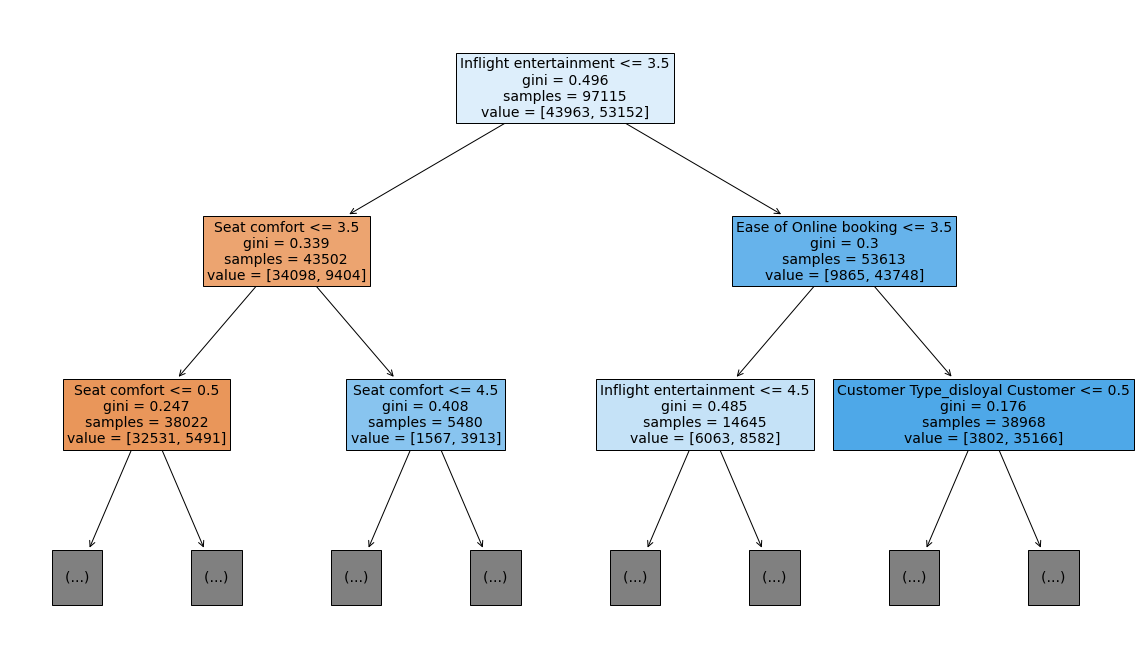

In [65]:
### YOUR CODE HERE ###
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns,filled=True);

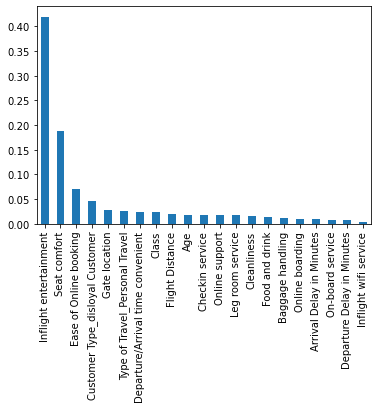

In [66]:
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

Which features did the model use first?

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reasons why each metric is important: 

- **Accuracy** tends to be the metric that the stakeholders can best understand.

- **Precision** measures what **proportion of predicted positives is truly positive**. For example, if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn. 

- **Recall** measures the **percentage of actual positives a model correctly identified (true positive)**. For this dataset, the airline might want to **limit false negatives** (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer. 

- **F1 balances precision and recall**. It is the harmonic mean of precision and recall, or their product divided by their sum.


## Conclusion

**What are some key takeaways that you learned from this lab?**

*   Machine learning workflows may be used to clean and encode data for machine learning.
*   While **hyperparameter tuning** can lead to **an increase in performance**, it doesn't always. 
*   The **visualization of the decision tree** as well as the **feature graph** can be used to **determine which features are most important** for a decision tree

**What findings would you share with others?**

*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The **confusion matrix is useful** as it shows a similar number of **true positives and true negatives**. 
*   The **visualization of the decision tree and the feature importance graph** both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
 
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged